Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:



In [2]:
NAME = ""
COLLABORATORS = ""


Consider the following third-order ODE that describes a simplified mechanical system:

y''' - 3y'' + 2y' - y = sin(t),

where t is the independent variable and y(t) is the dependent variable.

The initial conditions are:
y(0) = 0,
y'(0) = 1,
y''(0) = -1.

Solve this ODE numerically for t in the range [0, 1] using Python's solve_ivp. 

Use an event to find where y=0 (besides the initial condition). Plot your solution, and the places where you found the events.

In [9]:
#solution

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE as a system of first-order equations
def third_order_ode(t, Y):
    # y[0] = y, y[1] = y', y[2] = y''
    y, yp, ypp = Y
    yppp = 3 * ypp - 2 * yp + y + np.sin(t)
    
    dydt = [
        yp,   # y' = y[1]
        ypp,  # y'' = y[2]
        yppp  # y''' = 3y'' - 2y' + y + sin(t)
    ]
    return dydt

def event(t, Y):
    y, yp, ypp = Y
    return y

# Initial conditions: y(0) = 0, y'(0) = 1, y''(0) = -1
y0 = [0, 1, -1]

# Time range for the solution
t_span = (0, 1)

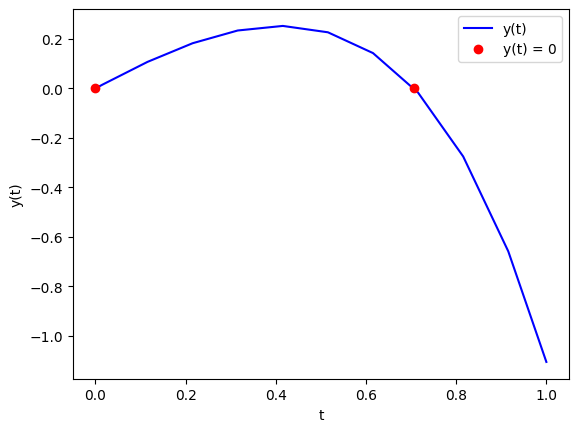

In [19]:
#solution
sol = solve_ivp(third_order_ode, t_span, y0, events=event, max_step=0.1)

# Extract the solution
t = sol.t
y = sol.y[0]  # y[0] corresponds to y(t)

# Plot the solution
plt.plot(sol.t, sol.y[0], label='y(t)', color='b')
plt.xlabel("t")
plt.ylabel("y(t)");

plt.plot(sol.t_events[0], sol.y_events[0][:, 0], 'ro')

plt.legend(['y(t)', 'y(t) = 0']);

---



When you are done, download a PDF and turn it in on Canvas. Make sure to save your notebook, then run this cell and click on the download link.

In [ ]:
%run ~/s25-06623/s25.py
%pdf